In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#import bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
#from tensorflow.keras.preprocessing import image

%matplotlib inline

# Exploration des Métadonnées

In [ ]:
# Emplacement
path = '/content/gdrive/MyDrive/Projet Radio DST/data/'

#Import des fichiers METADATA

df_covid = pd.read_excel(path + "COVID.metadata.xlsx")
df_lung_opacity = pd.read_excel(path + "Lung_Opacity.metadata.xlsx")
df_normal = pd.read_excel(path + "Normal.metadata.xlsx")
df_pneumonia = pd.read_excel(path + "Viral Pneumonia.metadata.xlsx")

In [ ]:
df_covid.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
df_lung_opacity.head()

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
df_normal['FILE NAME'] = df_normal['FILE NAME'].str.capitalize()
df_normal.head()

,FILE NAME,FORMAT,SIZE,URL
0,Normal-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Normal-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Normal-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Normal-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Normal-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
df_pneumonia.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [ ]:
# Type des Variables

df_covid.info()
print("\n------------------\n")
df_lung_opacity.info()
print("\n------------------\n")
df_normal.info()
print("\n------------------\n")
df_pneumonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  3616 non-null   object
 1   FORMAT     3616 non-null   object
 2   SIZE       3616 non-null   object
 3   URL        3616 non-null   object
dtypes: object(4)
memory usage: 113.1+ KB

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  6012 non-null   object
 1   FORMAT     6012 non-null   object
 2   SIZE       6012 non-null   object
 3   URL        6012 non-null   object
dtypes: object(4)
memory usage: 188.0+ KB

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10192 entries, 0 to 10191
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FIL

In [ ]:
#ANALYSE : Les 4 Jdds ont les mêmes nom de variables, aspects et types d'objets, on peut donc les concaténer pour faciliter leur exploration.

In [ ]:
# Concaténation des Métadonnées pour générer un seul Jeu de Données

# Création d'une colonne avec le label associé de chaque catégorie
df_covid['label'] = 'COVID'
df_lung_opacity['label'] = 'Lung_Opacity'
df_normal['label'] = 'Normal'
df_pneumonia['label'] = 'Viral Pneumonia'

df = pd.concat([df_covid, df_lung_opacity, df_normal, df_pneumonia], axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21165 entries, 0 to 1344
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  21165 non-null  object
 1   FORMAT     21165 non-null  object
 2   SIZE       21165 non-null  object
 3   URL        21165 non-null  object
 4   label      21165 non-null  object
dtypes: object(5)
memory usage: 992.1+ KB


# Analyse Jeu de Données Concaténé

In [ ]:
df.duplicated().any()
# On ne trouve aucun doublon

False

In [ ]:
df.isna().any()
# On ne trouve aucune valeur manquante

FILE NAME    False
FORMAT       False
SIZE         False
URL          False
label        False
dtype: bool

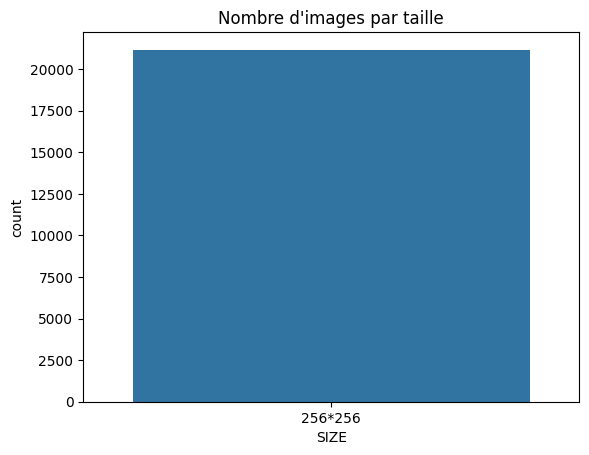

In [ ]:
# Graph nombre d'images par taille

sns.countplot(x = "SIZE", data = df)
plt.title("Nombre d'images par taille");

In [ ]:
#ANALYSE : THEORIQUEMENT, toutes les images du jeu de données ont la même taille.

### Etude Répartition des Images par Catégorie

In [ ]:
# Pour ordonner le Jeu de Données entre eux on crée une variable label_index

df["label_index"] = df["label"].replace(["Normal", "Lung_Opacity", "Viral Pneumonia", "COVID"], [0,1,2,3])

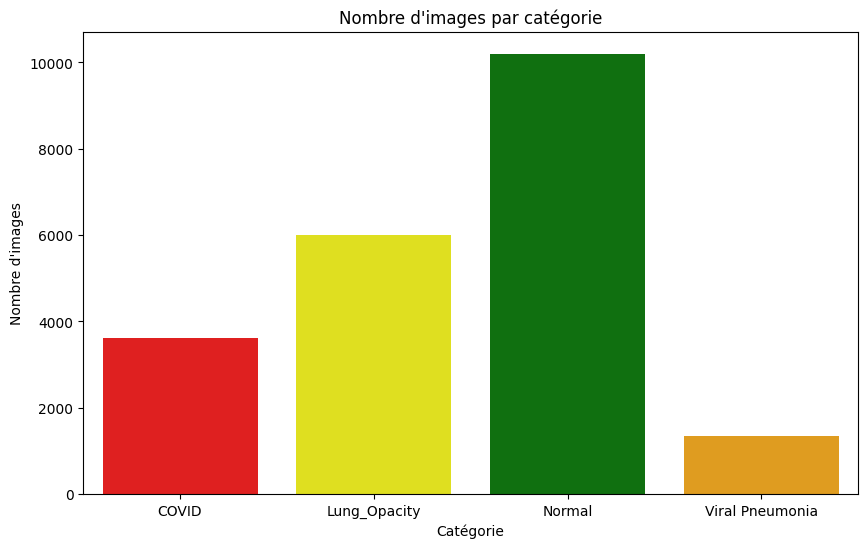

In [ ]:
# Graphique du nombre d'image par jdd

colors = ["red","yellow", "green", "orange"] # On essaiera de garder ce code couleur par la suite

plt.figure(figsize = (10,6))
g = sns.countplot(x = "label", data = df, palette = colors)
plt.title("Nombre d'images par catégorie")
g.set_xlabel("Catégorie")
g.set_ylabel("Nombre d'images");

### Etude Répartition des Images par Source

In [ ]:
# Pour simplifier la lecture on crée une variable simplifiée de désignation de la source

urls = list(df["URL"].unique())
noms_simplifies = ["KGL_RSNA_Pneumonia", "KGL_Chest_Xray_Pneumonia", "SIRM_Covid", "GitHub_covid_repo", "Eurorad", "GitHub_covid_CXNet", "GitHub_covid_chestray_ds", "Bimcv_covid19"]

# Création nouvelle variables avec noms simplifiés
df["source"] = df["URL"].replace(urls, noms_simplifies)
df.head()

,FILE NAME,FORMAT,SIZE,URL,label,label_index,source
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia


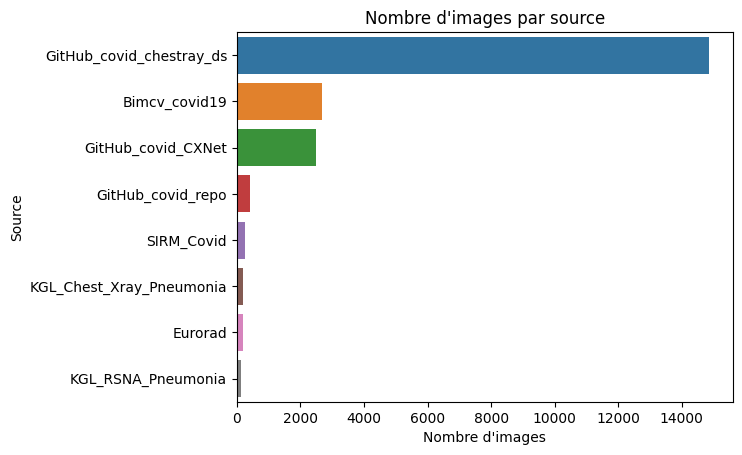

In [ ]:
# Graphique du nombre d'images par source

g = sns.countplot(y = "source", data = df, order = df["source"].value_counts().index)
plt.title("Nombre d'images par source", size = 12)
g.set_xlabel("Nombre d'images")
g.set_ylabel("Source")
plt.legend;

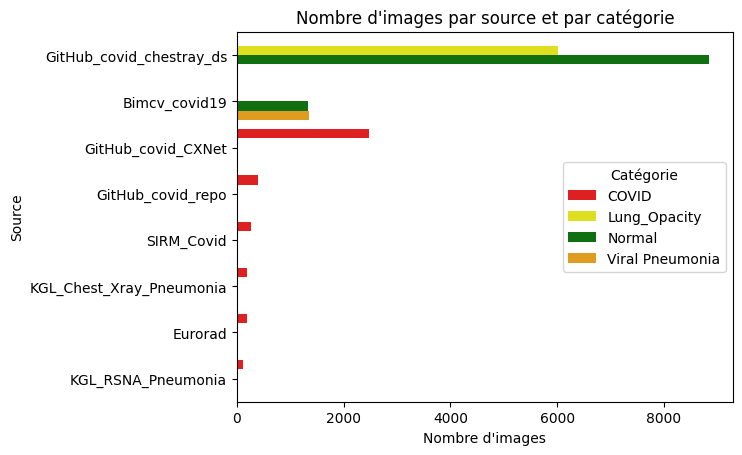

In [ ]:
 # Graphique du nombre d'images par source et par jdd


g = sns.countplot(y = "source", data = df, hue = "label", palette = colors, order = df["source"].value_counts().index)
plt.title("Nombre d'images par source et par catégorie", size = 12)
g.set_xlabel("Nombre d'images")
g.set_ylabel("Source")
plt.legend(title = "Catégorie", loc = "center right");

# Exploration des Images du Jeu de Données

In [ ]:
# Pointage vers l'emplacement des images
df["path"] = path + df["label"] + "/" + "images" + "/" + df["FILE NAME"] + "." + df["FORMAT"].str.lower()
df = df.reset_index()
df.head()

,index,FILE NAME,FORMAT,SIZE,URL,label,label_index,source,path
0,0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...
1,1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...
2,2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...
3,3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...
4,4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...


In [ ]:
df.shape

(21165, 9)

COVID-1251


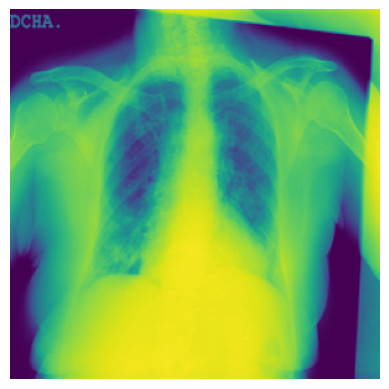

In [ ]:
# Affichage d'une image

image_test = plt.imread(df.iloc[1250]["path"])
print(df.iloc[1250]["FILE NAME"])
plt.imshow(image_test)
plt.axis('off');

In [ ]:
print('Image Shape: {}'.format(image_test.shape))
print('Image Height: {}'.format(image_test.shape[0]))
print('Image Width: {}'.format(image_test.shape[1]))
print('Image Dimension: {}'.format(image_test.ndim))
print('Image Size: {}kb'.format(image_test.size//1024))
print('Image Data Type: {}'.format(image_test.dtype))
print('Maximum RGB value of the image: {}'.format(image_test.max()))
print('Minimum RGB value of the image: {}'.format(image_test.min()))

Image Shape: (299, 299)
Image Height: 299
Image Width: 299
Image Dimension: 2
Image Size: 87kb
Image Data Type: float32
Maximum RGB value of the image: 0.9882352948188782
Minimum RGB value of the image: 0.0


## Stockage des images sous forme d'array

In [ ]:
#On convertit toutes les images en 75 x 75 et en niveau de gris pour obtenir une matrice de dim 75 x 75 x 1
df["image"] = df["path"].map(lambda x: np.asarray(Image.open(x).convert("L").resize((75,75))))

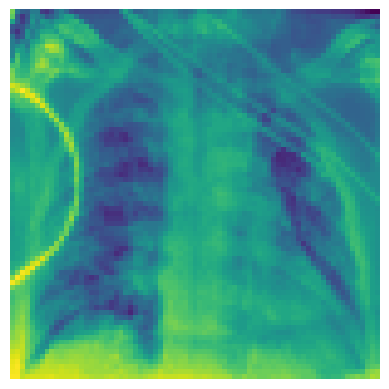

In [ ]:
# Teste
img = Image.fromarray(df.loc[1326,"image"])
plt.imshow(img)
plt.axis('off');

# Statistique sur les Images

In [ ]:
#Mesure d'intensités

im_mean = []
im_std = []
im_max = []
im_min = []

for i in range(0, len(df)):
    im_mean.append(np.mean(df["image"][i]))
    im_std.append(np.std(df["image"][i]))
    im_max.append(np.max(df["image"][i]))
    im_min.append(np.min(df["image"][i]))

df["im_mean"] = im_mean
df["im_std"] = im_std
df["im_max"] = im_max
df["im_min"] = im_min
df.head()

,index,FILE NAME,FORMAT,SIZE,URL,label,label_index,source,path,image,im_mean,im_std,im_max,im_min
0,0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[15, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",145.912889,51.656605,214,0
1,1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[187, 185, 188, 187, 190, 130, 71, 77, 75, 78...",150.646756,48.602517,236,63
2,2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[218, 204, 149, 124, 104, 86, 81, 68, 63, 58,...",140.607289,49.543767,245,0
3,3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[16, 22, 18, 136, 170, 160, 164, 147, 141, 14...",116.692444,56.946731,238,8
4,4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[188, 189, 189, 191, 161, 94, 96, 96, 97, 97,...",167.714844,47.833843,240,56


In [ ]:
# Apercu des différentes variables créées

df.describe()

,index,label_index,im_mean,im_std,im_max,im_min
count,21165.000000,21165.000000,21165.000000,21165.000000,21165.000000,21165.000000
mean,3658.972927,0.923695,129.931615,58.591817,231.413796,2.119112
std,2736.388826,1.105769,23.509027,11.092750,21.770428,7.374159
min,0.000000,0.000000,25.586489,13.877663,57.000000,0.000000
25%,1322.000000,0.000000,113.340622,51.222849,221.000000,0.000000
50%,3079.000000,1.000000,127.147911,59.643776,240.000000,0.000000
75%,5456.000000,1.000000,146.735467,66.735864,247.000000,0.000000
max,10191.000000,3.000000,229.414400,106.490735,255.000000,117.000000


### Graphiques

Text(0.5, 1.0, 'Distribution des moyennes de luminosité en fonction des sources')

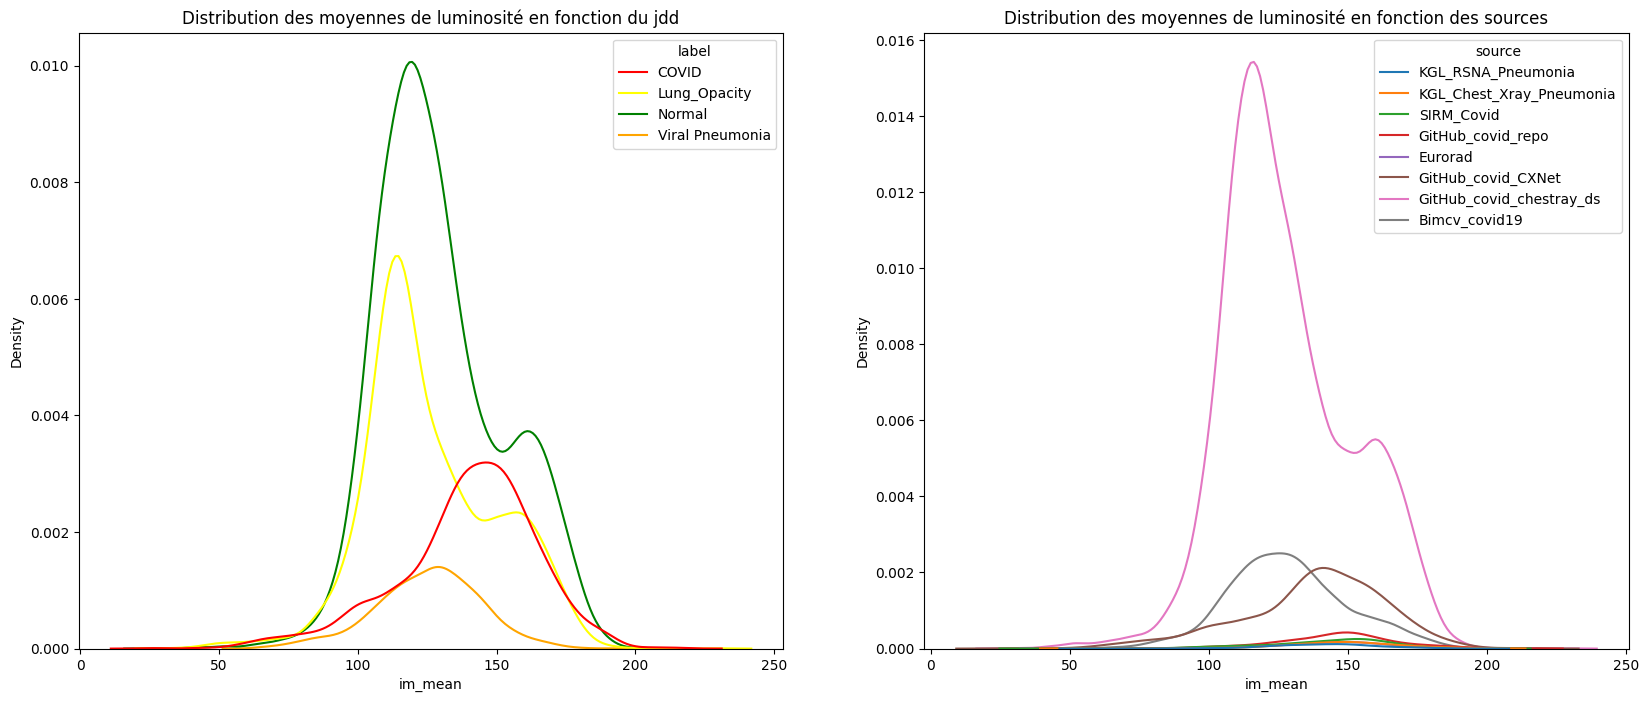

In [ ]:
# Moyennes

plt.figure(figsize = (20,8))
plt.subplot(121)
sns.kdeplot(x = "im_mean", data = df, hue = "label", palette = colors)
plt.title("Distribution des moyennes de luminosité en fonction du jdd")
plt.subplot(122)
sns.kdeplot(x = "im_mean", data = df, hue = "source")
plt.title("Distribution des moyennes de luminosité en fonction des sources")

Text(0.5, 1.0, 'Distribution des écarts-types de luminosité en fonction des sources')

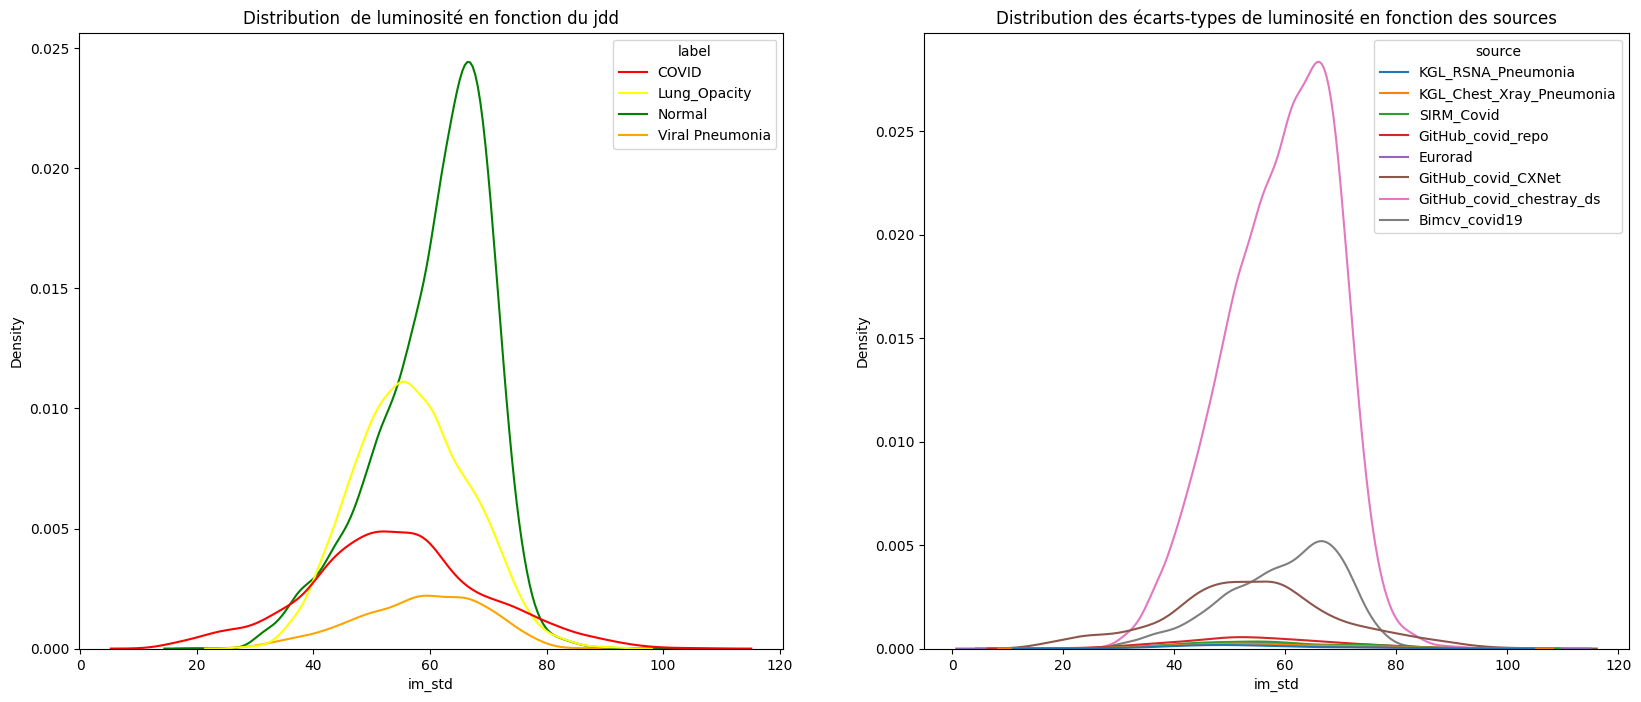

In [ ]:
# Ecarts-types

plt.figure(figsize = (20,8))
plt.subplot(121)
sns.kdeplot(x = "im_std", data = df, hue = "label", palette = colors)
plt.title("Distribution  de luminosité en fonction du jdd")
plt.subplot(122)
sns.kdeplot(x = "im_std", data = df, hue = "source")
plt.title("Distribution des écarts-types de luminosité en fonction des sources")

Text(0.5, 1.0, 'Distribution du maximum de luminosité en fonction des sources')

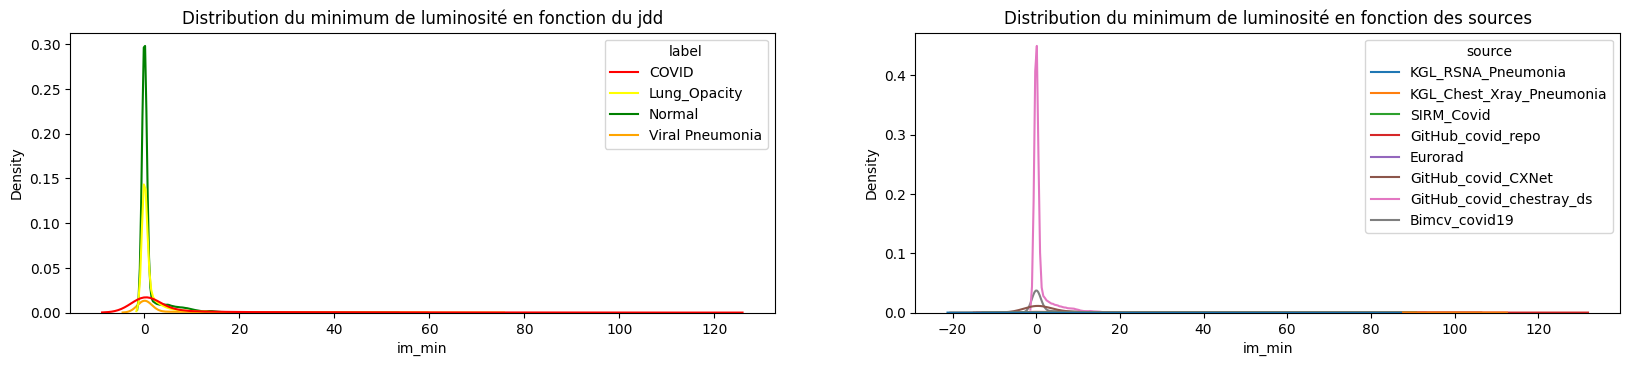

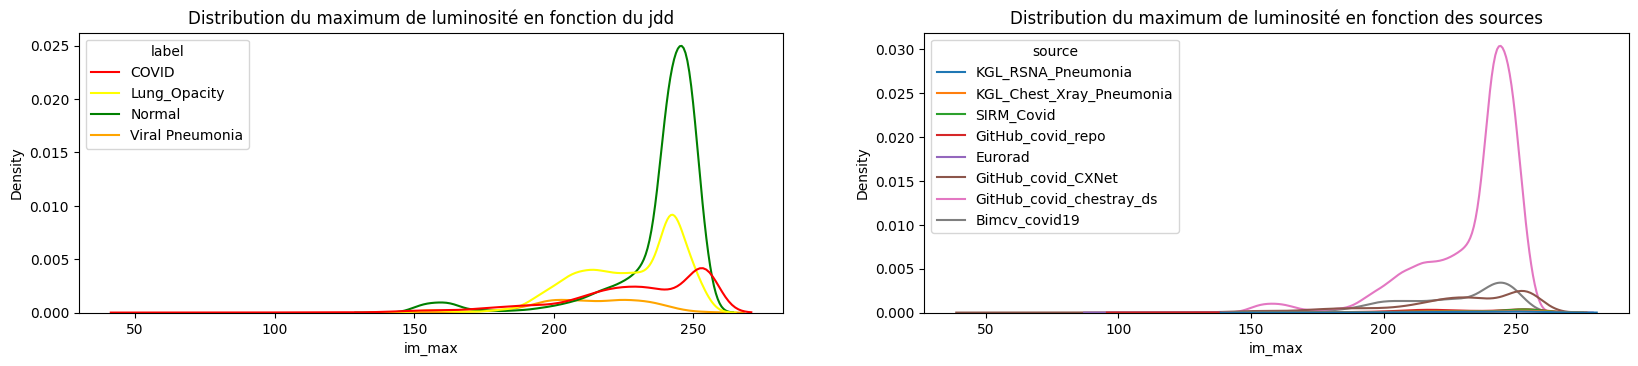

In [ ]:
# Min et Max

plt.figure(figsize = (20,8))
plt.subplot(221)
sns.kdeplot(x = "im_min", data = df, hue = "label", palette = colors)
plt.title("Distribution du minimum de luminosité en fonction du jdd")
plt.subplot(222)
sns.kdeplot(x = "im_min", data = df, hue = "source")
plt.title("Distribution du minimum de luminosité en fonction des sources")

#Rien d'intéressant tout est à 0

plt.figure(figsize = (20,8))
plt.subplot(223)
sns.kdeplot(x = "im_max", data = df, hue = "label", palette = colors)
plt.title("Distribution du maximum de luminosité en fonction du jdd")
plt.subplot(224)
sns.kdeplot(x = "im_max", data = df, hue = "source")
plt.title("Distribution du maximum de luminosité en fonction des sources")

# Intégration des masques

In [ ]:
# Pointage vers l'emplacement des images

df["mk_path"] = path + df["label"] + "/" + "masks" + "/" + df["FILE NAME"]+ "." + df["FORMAT"].str.lower()
df = df.reset_index()
df.head()

,level_0,index,FILE NAME,FORMAT,SIZE,URL,label,label_index,source,path,image,im_mean,im_std,im_max,im_min,mk_path
0,0,0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[15, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",145.912889,51.656605,214,0,/content/gdrive/MyDrive/Projet Radio DST/data/...
1,1,1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[187, 185, 188, 187, 190, 130, 71, 77, 75, 78...",150.646756,48.602517,236,63,/content/gdrive/MyDrive/Projet Radio DST/data/...
2,2,2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[218, 204, 149, 124, 104, 86, 81, 68, 63, 58,...",140.607289,49.543767,245,0,/content/gdrive/MyDrive/Projet Radio DST/data/...
3,3,3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[16, 22, 18, 136, 170, 160, 164, 147, 141, 14...",116.692444,56.946731,238,8,/content/gdrive/MyDrive/Projet Radio DST/data/...
4,4,4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[188, 189, 189, 191, 161, 94, 96, 96, 97, 97,...",167.714844,47.833843,240,56,/content/gdrive/MyDrive/Projet Radio DST/data/...


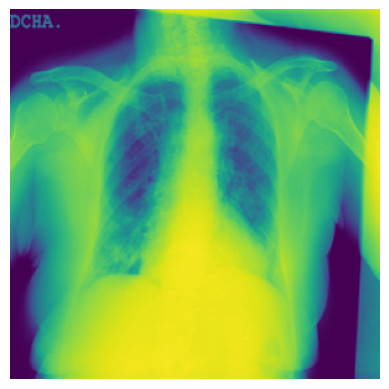

In [ ]:
# Test

mask_test = plt.imread(df.iloc[1250]["path"])
plt.imshow(mask_test)
plt.axis('off');

In [ ]:
print('Image Shape: {}'.format(mask_test.shape))
print('Image Height: {}'.format(mask_test.shape[0]))
print('Image Width: {}'.format(mask_test.shape[1]))
print('Image Dimension: {}'.format(mask_test.ndim))
print('Image Size: {}kb'.format(mask_test.size//1024))
print('Image Data Type: {}'.format(image_test.dtype))
print('Maximum RGB value of the image: {}'.format(mask_test.max()))
print('Minimum RGB value of the image: {}'.format(mask_test.min()))

Image Shape: (299, 299)
Image Height: 299
Image Width: 299
Image Dimension: 2
Image Size: 87kb
Image Data Type: float32
Maximum RGB value of the image: 0.9882352948188782
Minimum RGB value of the image: 0.0


## Stockage des masks sous forme d'array

In [ ]:
# Création d'un colonne pour stocker les masques sous forme d'array 75x75x1, à la même dim que les images (en niveau de gris)

df["mask"] = df["mk_path"].map(lambda x: np.asarray(Image.open(x).convert('L').resize((75,75))))
df.head()

,level_0,index,FILE NAME,FORMAT,SIZE,URL,label,label_index,source,path,image,im_mean,im_std,im_max,im_min,mk_path,mask
0,0,0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[15, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",145.912889,51.656605,214,0,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[187, 185, 188, 187, 190, 130, 71, 77, 75, 78...",150.646756,48.602517,236,63,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[218, 204, 149, 124, 104, 86, 81, 68, 63, 58,...",140.607289,49.543767,245,0,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[16, 22, 18, 136, 170, 160, 164, 147, 141, 14...",116.692444,56.946731,238,8,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[188, 189, 189, 191, 161, 94, 96, 96, 97, 97,...",167.714844,47.833843,240,56,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


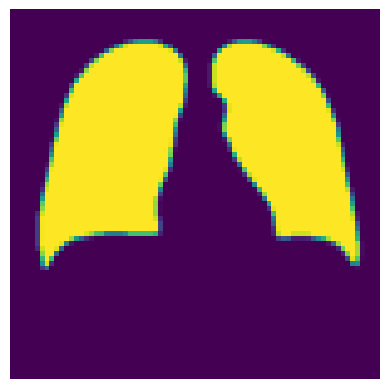

In [ ]:
img = Image.fromarray(df.loc[16543,"mask"])
plt.imshow(img)
plt.axis('off');

## Stockage des images filtrées par les masques

In [ ]:
#On définit une fonction de concaténation d'une image et d'un masque

def concatImMk (image, mask) :
    if (image.shape == mask.shape) : # S'ils ont les mêmes dimensions
        concat_im_mk = np.zeros(image.shape)
        for i in range(0, image.shape[0]) :
            for j in range(0, image.shape[1]) :
                if (mask[i,j] !=0) :
                    concat_im_mk[i,j] = image[i,j]
        return concat_im_mk

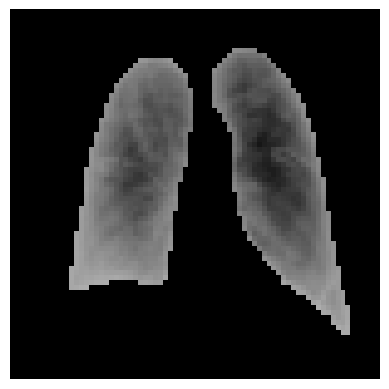

In [ ]:
# Test
im_mk_test = concatImMk(df.loc[2,"image"], df.loc[2,"mask"])

img = Image.fromarray(im_mk_test)
plt.imshow(img)
plt.axis('off');

In [ ]:
# Application à toutes les images

im_mkd = []

for i in range(0, len(df)):
    im_mkd.append(concatImMk(df.loc[i,"image"], df.loc[i,"mask"]))

df["im_mkd"] = im_mkd

# Statistique sur les Images Masquées

In [ ]:
#Calcul et stockage de différentes mesures sur les images

im_mk_mean = []
im_mk_std = []
im_mk_max = []
im_mk_min = []

for i in range(0, len(df)):
    im_mk_mean.append(np.mean(df["im_mkd"][i]))
    im_mk_std.append(np.std(df["im_mkd"][i]))
    im_mk_max.append(np.max(df["im_mkd"][i]))
    im_mk_min.append(np.min(df["im_mkd"][i]))

df["im_mkd_mean"] = im_mk_mean
df["im_mkd_std"] = im_mk_std
df["im_mkd_max"] = im_mk_max
df["im_mkd_min"] = im_mk_min

df.head()

,level_0,index,FILE NAME,FORMAT,SIZE,URL,label,label_index,source,path,...,im_std,im_max,im_min,mk_path,mask,im_mkd,im_mkd_mean,im_mkd_std,im_mkd_max,im_mkd_min
0,0,0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,...,51.656605,214,0,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",34.120000,59.133458,185.0,0.0
1,1,1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,...,48.602517,236,63,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",31.205867,53.595906,231.0,0.0
2,2,2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,...,49.543767,245,0,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",31.466667,51.472684,173.0,0.0
3,3,3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,...,56.946731,238,8,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",35.463289,54.378052,236.0,0.0
4,4,4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,3,KGL_RSNA_Pneumonia,/content/gdrive/MyDrive/Projet Radio DST/data/...,...,47.833843,240,56,/content/gdrive/MyDrive/Projet Radio DST/data/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",36.567111,64.767060,239.0,0.0


## Graphiques sur les Images Masquées

Text(0.5, 1.0, 'Distribution des moyennes de luminosité en fonction des sources après masque')

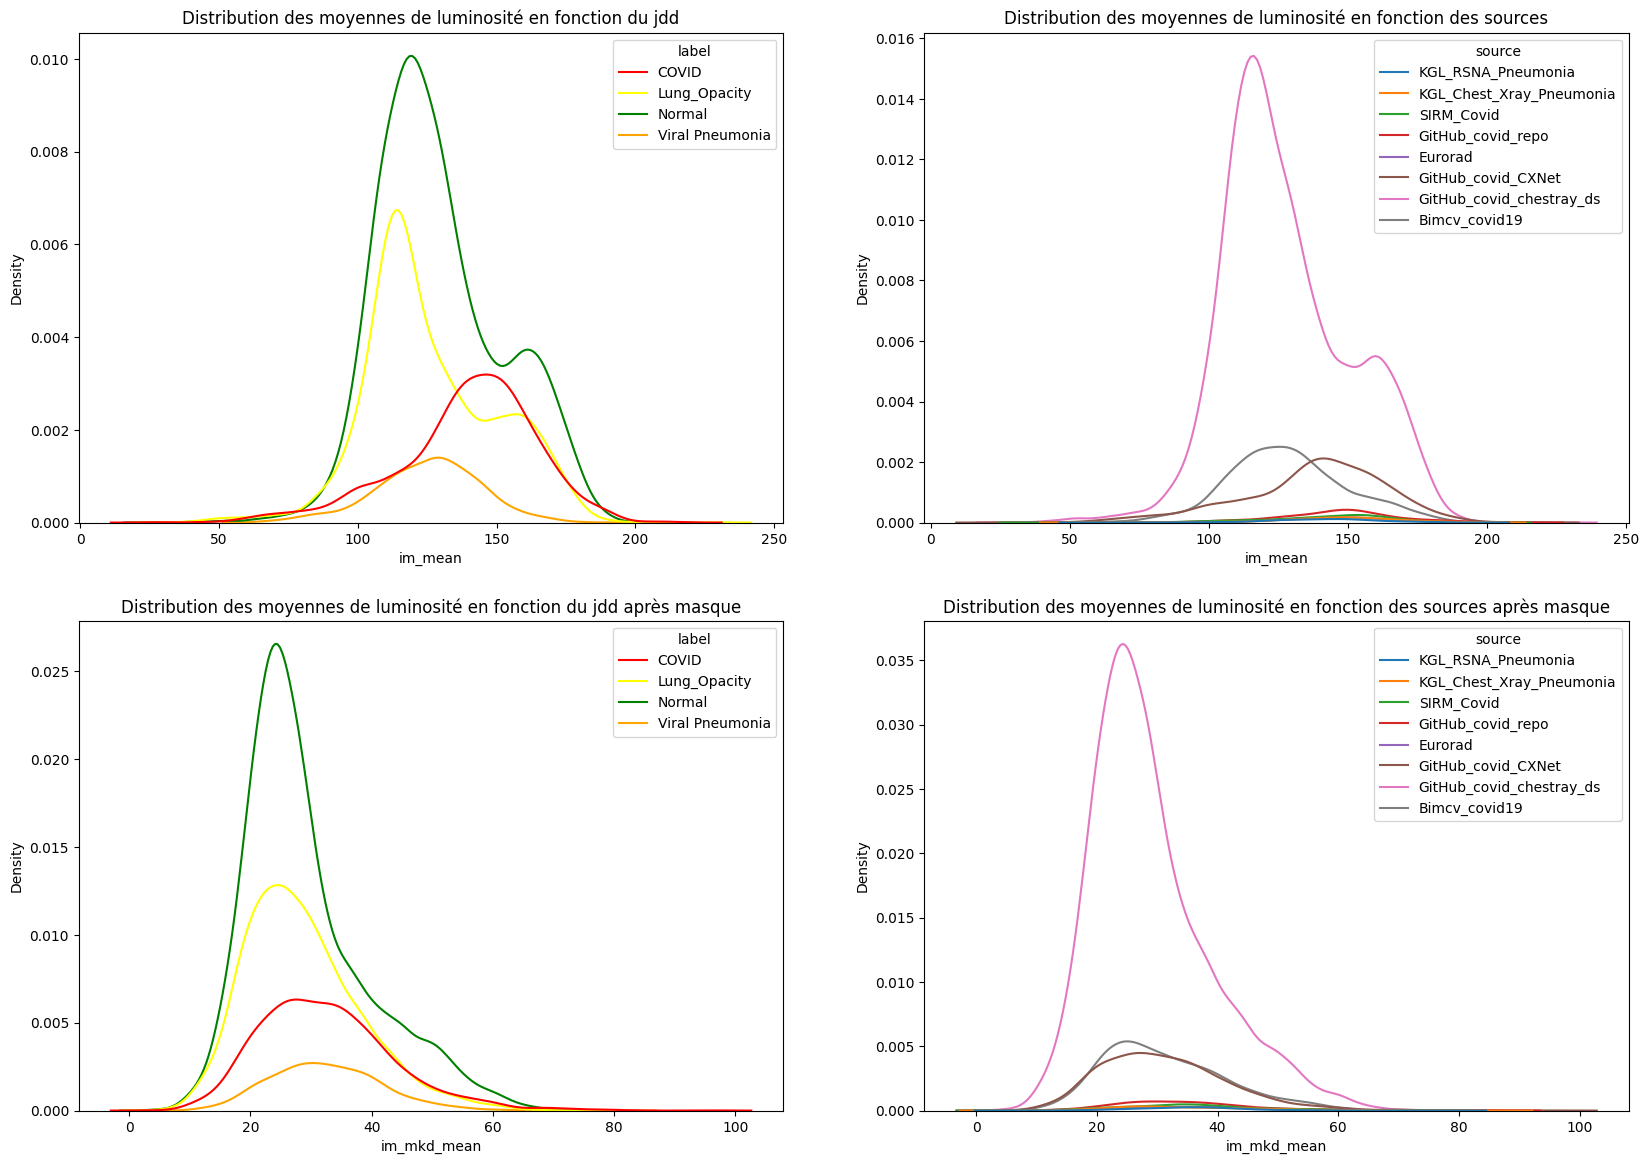

In [ ]:
# Moyennes

plt.figure(figsize = (20,14))
plt.subplot(221)
sns.kdeplot(x = "im_mean", data = df, hue = "label", palette = colors)
plt.title("Distribution des moyennes de luminosité en fonction du jdd")
plt.subplot(222)
sns.kdeplot(x = "im_mean", data = df, hue = "source")
plt.title("Distribution des moyennes de luminosité en fonction des sources")

plt.subplot(223)
sns.kdeplot(x = "im_mkd_mean", data = df, hue = "label", palette = colors)
plt.title("Distribution des moyennes de luminosité en fonction du jdd après masque")
plt.subplot(224)
sns.kdeplot(x = "im_mkd_mean", data = df, hue = "source")
plt.title("Distribution des moyennes de luminosité en fonction des sources après masque")